# Football Predictor using Poisson Distribution 

In [7]:
# import libraries

import pandas as pd 
import matplotlib as plt
import numpy as np 
import seaborn 

from scipy.stats import poisson,skellam
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [5]:
dataset = pd.read_csv('Dataset.csv')
dataset = dataset[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
dataset = dataset.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
dataset.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Parma,Juventus,0,1
1,Fiorentina,Napoli,3,4
2,Udinese,Milan,1,0
3,Cagliari,Brescia,0,1
4,Roma,Genoa,3,3


In [10]:
dataset = dataset[:-10]   # Our task is to model the last round of fixtures 
dataset.mean()     # As seen below, the home team scores more goals on average. 

HomeGoals    1.525641
AwayGoals    1.333333
dtype: float64

In [12]:
# The number of goals scored by each team can be approximated by a 
# Poisson Distribution

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

goal_model_data = pd.concat([dataset[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           dataset[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  156
Model:                            GLM   Df Residuals:                      116
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -208.69
Date:                Thu, 31 Oct 2019   Deviance:                       131.15
Time:                        20:39:59   Pearson chi2:                     106.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8987      0.390      2.302      0.021       0.134       1.664
team[T.Bologna]           -0.4618      0.402     -1.150      0.250      -1.249       0.325
team[T.Brescia]           -0.4381      0.479     -0.915      0.360      -1.376       0.500
team[T.Cagliari]          -0.4223      0.389     -1.086      0.277      -1.185       0.340
team[T.Fiorentina]        -0.2942      0.393     -0.748      0.455      -1.065       0.477
team[T.Genoa]             -0.6826      0.423     -1.613      0.107      -1.512       0.147
team[T.Inter]              0.0130      0.344      0.038      0.970      -0.660       0.686
team[T.Juventus]          -0.1421      0.371     -0.383      0.702      -0.870       0.586
team[T.Lazio]             -0.2237      0.358     -0.625      0.532      -0.926       0.478
team[T.Lecce]             -0.6075      0.422     -1.439      0.150      -1.435       0.220
team[T.Milan]             -0.8118      0.428     -1.895      0.058      -1.651       0.028
team[T.Napoli]             0.0039      0.349      0.011      0.991      -0.680       0.688
team[T.Parma]             -0.3421      0.367     -0.933      0.351      -1.061       0.377
team[T.Roma]              -0.6013      0.376     -1.600      0.109      -1.338       0.135
team[T.Sampdoria]         -1.4540      0.553     -2.627      0.009      -2.539      -0.369
team[T.Sassuolo]          -0.1441      0.374     -0.385      0.700      -0.877       0.589
team[T.Spal]              -1.1643      0.478     -2.435      0.015      -2.101      -0.227
team[T.Torino]            -0.7391      0.406     -1.823      0.068      -1.534       0.056
team[T.Udinese]           -1.4951      0.567     -2.636      0.008      -2.607      -0.383
team[T.Verona]            -1.0514      0.489     -2.151      0.031      -2.009      -0.094
opponent[T.Bologna]       -0.0428      0.431     -0.099      0.921      -0.888       0.802
opponent[T.Brescia]       -0.1377      0.472     -0.292      0.771      -1.063       0.788
opponent[T.Cagliari]      -0.6496      0.493     -1.318      0.187      -1.615       0.316
opponent[T.Fiorentina]    -0.1214      0.452     -0.268      0.788      -1.008       0.765
opponent[T.Genoa]          0.3094      0.378      0.818      0.413      -0.432       1.051
opponent[T.Inter]         -0.5609      0.486     -1.154      0.249      -1.514       0.392
opponent[T.Juventus]      -0.7306      0.494     -1.480      0.139      -1.698       0.237
opponent[T.Lazio]         -0.3710      0.458     -0.809      0.418      -1.269       0.527
opponent[T.Lecce]          0.1980      0.398      0.498      0.619      -0.582       0.978
opponent[T.Milan]         -0.0607      0.432     -0.141      0.888      -0.907       0.785
opponent[T.Napoli]        -0.1952      0.443     -0.440      0.660      -1.064  

##  Predicting the Seria A Games 

### Juventus VS Bologna


In [17]:
poisson_model.predict(pd.DataFrame(data={'team': 'Juventus', 'opponent': 'Bologna',
                                       'home':1},index=[1]))

1    2.374495
dtype: float64

In [18]:
poisson_model.predict(pd.DataFrame(data={'team': 'Bologna', 'opponent': 'Juventus',
                                       'home':0},index=[1]))

1    0.74549
dtype: float64

#### Home Win for Juventus 

### Lazio VS Atalanta

In [19]:
poisson_model.predict(pd.DataFrame(data={'team': 'Lazio', 'opponent': 'Atalanta',
                                       'home':1},index=[1]))

1    2.284192
dtype: float64

In [20]:
poisson_model.predict(pd.DataFrame(data={'team': 'Atalanta', 'opponent': 'Lazio',
                                       'home':0},index=[1]))

1    1.695057
dtype: float64

#### Draw 

### Napoli VS Verona

In [21]:
poisson_model.predict(pd.DataFrame(data={'team': 'Napoli', 'opponent': 'Verona',
                                       'home':1},index=[1]))

1    1.601123
dtype: float64

In [22]:
poisson_model.predict(pd.DataFrame(data={'team': 'Verona', 'opponent': 'Napoli',
                                       'home':0},index=[1]))

1    0.706219
dtype: float64

#### Home win for Napoli

### Sassuolo VS Inter

In [23]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sassuolo', 'opponent': 'Inter',
                                       'home':1},index=[1]))

1    1.411566
dtype: float64

In [24]:
poisson_model.predict(pd.DataFrame(data={'team': 'Inter', 'opponent': 'Sassuolo',
                                       'home':0},index=[1]))

1    3.541008
dtype: float64

#### Away win for Inter

### Udinese VS Torino 

In [26]:
poisson_model.predict(pd.DataFrame(data={'team': 'Udinese', 'opponent': 'Torino',
                                       'home':1},index=[1]))

1    0.533197
dtype: float64

In [27]:
poisson_model.predict(pd.DataFrame(data={'team': 'Torino', 'opponent': 'Udinese',
                                       'home':0},index=[1]))

1    0.534684
dtype: float64

#### Draw

### Sampdoria VS Roma

In [28]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sampdoria', 'opponent': 'Roma',
                                       'home':1},index=[1]))

1    0.485667
dtype: float64

In [29]:
poisson_model.predict(pd.DataFrame(data={'team': 'Roma', 'opponent': 'Sampdoria',
                                       'home':0},index=[1]))

1    1.395063
dtype: float64

#### Away win for Roma

### Cagliari VS Spal

In [31]:
poisson_model.predict(pd.DataFrame(data={'team': 'Cagliari', 'opponent': 'Spal',
                                       'home':1},index=[1]))

1    1.741748
dtype: float64

In [32]:
poisson_model.predict(pd.DataFrame(data={'team': 'Spal', 'opponent': 'Cagliari',
                                       'home':1},index=[1]))

1    0.465726
dtype: float64

#### Home win for Cagliari 

### Parma VS Genoa

In [33]:
poisson_model.predict(pd.DataFrame(data={'team': 'Parma', 'opponent': 'Genoa',
                                       'home':1},index=[1]))

1    2.76497
dtype: float64

In [34]:
poisson_model.predict(pd.DataFrame(data={'team': 'Genoa', 'opponent': 'Parma',
                                       'home':0},index=[1]))

1    1.128485
dtype: float64

#### Home Win

### Milan VS Lecce

In [35]:
poisson_model.predict(pd.DataFrame(data={'team': 'Milan', 'opponent': 'Lecce',
                                       'home':1},index=[1]))

1    1.546419
dtype: float64

In [36]:
poisson_model.predict(pd.DataFrame(data={'team': 'Lecce', 'opponent': 'Milan',
                                       'home':0},index=[1]))

1    1.259134
dtype: float64

#### Draw 

### Brescia VS Fiorentina

In [38]:
poisson_model.predict(pd.DataFrame(data={'team': 'Brescia', 'opponent': 'Fiorentina',
                                       'home':1},index=[1]))

1    1.632734
dtype: float64

In [39]:
poisson_model.predict(pd.DataFrame(data={'team': 'Fiorentina', 'opponent': 'Brescia',
                                       'home':0},index=[1]))

1    1.594903
dtype: float64

#### Draw

## Predicted Results 

Juventus VS Bologna : Home <br>
Lazio VS Atalanta : Draw <br>
Napoli VS Verona : Home <br>
Sassuolo VS Inter : Away <br>
Udinese VS Torino : Home <br>
Sampdoria VS Roma : Away <br>
Cagliari VS Spal : Home <br>
Parma VS Genoa : Home <br>
Milan VS Lecce : Home <br>
Brescia VS Fiorentina : Draw <br> 

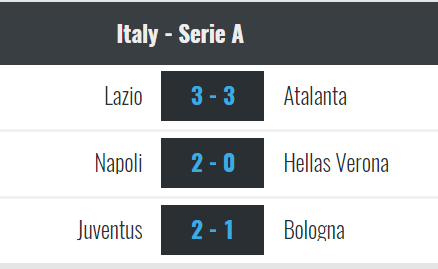

In [1]:
from IPython.display import Image 


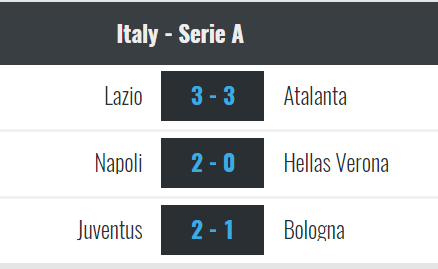

In [2]:
Image(filename='Results1.png')

## Actual Results

Image(filename='Results2.png')

![SundayResults](Results2.png)